In [47]:
'''
!pip install keras==2.4.3
import keras
print(keras.__version__)
!pip install keras==2.5.0rc0
import keras
print(keras.__version__)




SyntaxError: ignored

In [48]:
!pip install keras==2.4.3
import keras
print(keras.__version__)

2.4.3


In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
## CNN Activation
'''
In this book, I design and test all the experimental CNN models. To design my models, I use the python programming language. To perform the experimental review I use three different datasets, those are- Sign Language MNIST, Digit-Recognizer MNIST, and Skin Cancer MNIST. 
I use 10 epochs for the experimental fold. For the experimental purpose, I use one fold for each model. In this experiment, I used a total of twenty-seven similar types of CNN models. 
In this book, I analyze the performances of the CNN models for the different activation functions. After analyzing the results, I recommend the activation functions based on the performances for the convolutional layer in neural networks. 
The goal of this experiment is to help the developer to get a clear concept of the activation functions for the convolutional layers of the networks. 
'''

'\nIn this book, I design and test all the experimental CNN models. To design my models, I use the python programming language. To perform the experimental review I use three different datasets, those are- Sign Language MNIST, Digit-Recognizer MNIST, and Skin Cancer MNIST. \nI use 10 epochs for the experimental fold. For the experimental purpose, I use one fold for each model. In this experiment, I used a total of twenty-seven similar types of CNN models. \nIn this book, I analyze the performances of the CNN models for the different activation functions. After analyzing the results, I recommend the activation functions based on the performances for the convolutional layer in neural networks. \nThe goal of this experiment is to help the developer to get a clear concept of the activation functions for the convolutional layers of the networks. \n'

In [51]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

# Loading the ASL dataset

In [53]:
train_df = pd.read_csv("/content/drive/MyDrive/sign_mnist_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/sign_mnist_test.csv")
print(train_df)

       label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0          3     107     118     127  ...       206       204       203       202
1          6     155     157     156  ...       175       103       135       149
2          2     187     188     188  ...       198       195       194       195
3          2     211     211     212  ...       225       222       229       163
4         13     164     167     170  ...       157       163       164       179
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
27450     13     189     189     190  ...       234       200       222       225
27451     23     151     154     157  ...       195       195       195       194
27452     18     174     174     174  ...       203       202       200       200
27453     17     177     181     184  ...        47        64        87        93
27454     23     179     180     180  ...       197       205       209       215

[27455 rows x 7

In [54]:
test = pd.read_csv("/content/drive/MyDrive/sign_mnist_test.csv")
y = test['label']

In [83]:
print(y.shape)

(7172,)


In [55]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


# Data Visualization and Preprocessing

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


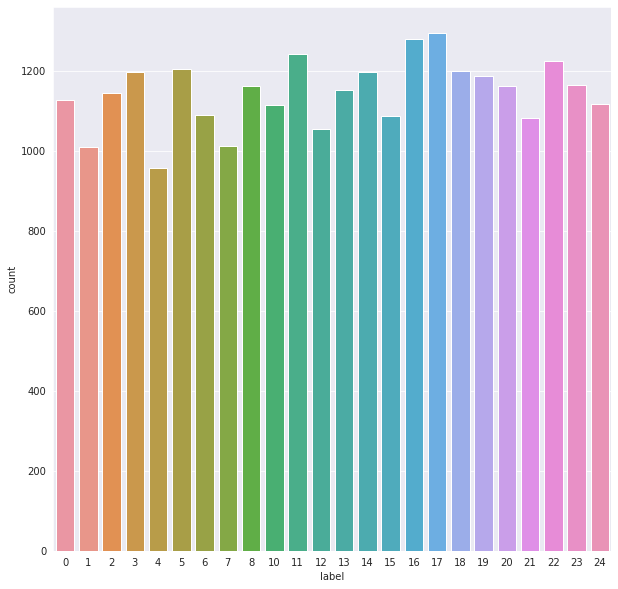

In [56]:
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(train_df['label'])

**The dataset seems balanced as for each training label , enough training examples exist**

In [57]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [58]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [59]:
x_train = train_df.values
x_test = test_df.values

**We perform a grayscale normalization to reduce the effect of illumination's differences.Moreover the CNN converges faster on [0..1] data than on [0..255].**

In [60]:
# Normalize the data
x_train = x_train / 255
x_test = x_test / 255

In [61]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

**Preview of first 10 images**

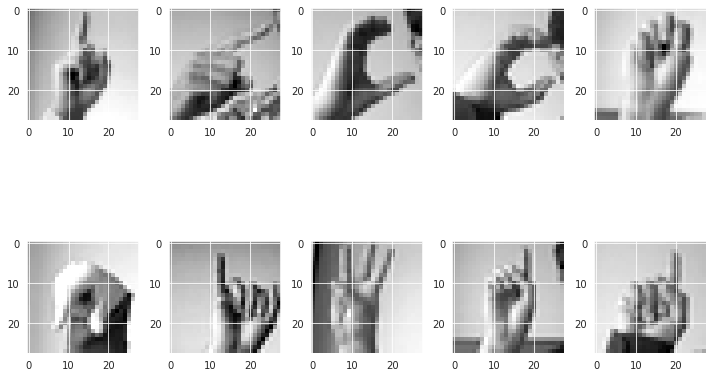

In [62]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()    

In [63]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [64]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [65]:
model = Sequential()
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'softplus' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'softplus'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 128)       512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 128)       512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)      

In [66]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 120) ,epochs = 15 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/15
229/229 [==============================] - 19s 76ms/step - loss: 3.8694 - accuracy: 0.4593 - val_loss: 3.5550 - val_accuracy: 0.1057
Epoch 2/15
229/229 [==============================] - 17s 73ms/step - loss: 1.2814 - accuracy: 0.7339 - val_loss: 1.9260 - val_accuracy: 0.4215
Epoch 3/15
229/229 [==============================] - 17s 74ms/step - loss: 0.7970 - accuracy: 0.8269 - val_loss: 0.6535 - val_accuracy: 0.8233
Epoch 4/15
229/229 [==============================] - 17s 74ms/step - loss: 0.5853 - accuracy: 0.8700 - val_loss: 0.4502 - val_accuracy: 0.8967
Epoch 5/15
229/229 [==============================] - 17s 74ms/step - loss: 0.4479 - accuracy: 0.8975 - val_loss: 0.4790 - val_accuracy: 0.9176
Epoch 6/15
229/229 [==============================] - 17s 73ms/step - loss: 0.3778 - accuracy: 0.9147 - val_loss: 0.5504 - val_accuracy: 0.8897
Epoch 7/15
229/229 [==============================] - 17s 74ms/step - loss: 0.3281 - accuracy: 0.9239 - val_loss: 0.1719 - val_accuracy:

In [67]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 2s 8ms/step - loss: 0.0857 - accuracy: 0.9805
Accuracy of the model is -  98.04796576499939 %


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
  plt.plot(train_history.history[train])  
  plt.plot(train_history.history[validation])  
  plt.title('Train History')  
  plt.ylabel(train)  
  plt.xlabel('Epoch')  
  plt.legend([train, validation], loc='upper left')  
  plt.show()   

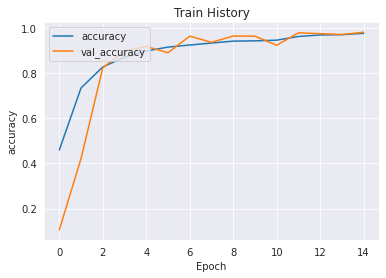

In [69]:
#show_train_history('acc','val_acc')
show_train_history(history,'accuracy','val_accuracy')

In [70]:
predictions = model.predict_classes(x_test)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]        

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([ 6,  5, 10,  0,  3])

In [72]:
import pandas as pd
pd.crosstab(y,predictions,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
label,,,,,,,,,,,,,,,,,,,,,,,,
0,331,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0
2,0,0,310,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,245,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,436,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,288,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y, predictions, target_names = classes))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       331
     Class 1       1.00      0.94      0.97       432
     Class 2       1.00      1.00      1.00       310
     Class 3       0.99      1.00      1.00       245
     Class 4       0.99      1.00      1.00       498
     Class 5       1.00      1.00      1.00       247
     Class 6       0.92      1.00      0.96       348
     Class 7       1.00      1.00      1.00       436
     Class 8       0.94      1.00      0.97       288
    Class 10       1.00      0.99      1.00       331
    Class 11       1.00      1.00      1.00       209
    Class 12       1.00      1.00      1.00       394
    Class 13       0.94      1.00      0.97       291
    Class 14       1.00      0.93      0.96       246
    Class 15       1.00      1.00      1.00       347
    Class 16       1.00      1.00      1.00       164
    Class 17       0.82      1.00      0.90       144
    Class 18       1.00    

In [74]:
cm = confusion_matrix(y,predictions)

In [75]:
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])

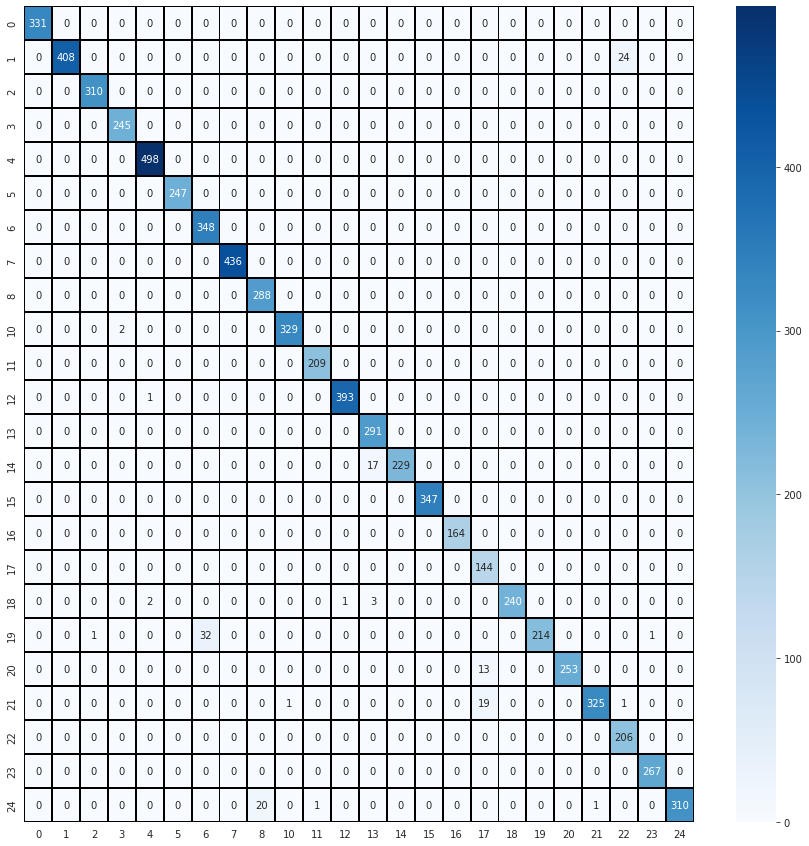

In [76]:
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='') 

In [82]:
correct = np.nonzero(predictions == y_test)[0]
print(correct)

[]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


**Some of the Correctly Predicted Classes**

In [84]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.imshow(x_test[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y[c]))
    plt.tight_layout()
    i += 1

In [85]:
model.save('model.h5')